
# **Linear Regression (With The Least Squares Method)**



measurements of hours of sunshine and ice creams sold

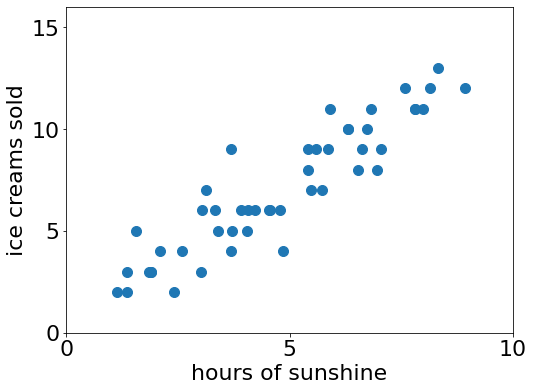

In [1]:
import numpy
import matplotlib.pyplot

data = numpy.array([(5.6,   9), (4.05,  5), (1.9,   3), (3.7,   9),  
                    (4.22,  6), (1.35,  3), (5.91, 11), (5.41,  9), 
                    (3.12,  7), (2.41,  2), (4.85,  4), (4.56,  6), 
                    (8.94, 12), (1.85,  3), (5.41,  8), (1.57,  5),
                    (5.86,  9), (3.71,  5), (1.89,  3), (7.58, 12),
                    (6.32, 10), (6.97,  8), (6.82, 11), (6.74, 10),
                    (1.13,  2), (2.09,  4), (4.53,  6), (3.01,  3),
                    (8.15, 12), (6.62,  9), (3.4,   5), (2.59,  4),
                    (3.91,  6), (7.8,  11), (7.05,  9), (3.34,  6),
                    (6.54,  8), (5.49,  7), (5.72,  7), (3.03,  6),
                    (7.81, 11), (8.33, 13), (6.3,  10), (3.69,  4),
                    (1.36,  2), (4.08,  6), (4.79,  6), (7.98, 11)])

def init_plot():
        matplotlib.rcParams.update({"font.size" : 22})
        matplotlib.pyplot.rcParams["figure.figsize"] = (8, 6)
        matplotlib.pyplot.xlim([0, 10])
        matplotlib.pyplot.ylim([0, 16])
        matplotlib.pyplot.xlabel("hours of sunshine")
        matplotlib.pyplot.ylabel("ice creams sold")
        matplotlib.pyplot.xticks([0, 5, 10])
        matplotlib.pyplot.yticks([0, 5, 10, 15])

init_plot()
scatter = matplotlib.pyplot.scatter(data[:, 0], data[:, 1], s = 100)

This "machine learning" part uses the method of least squares to create a "model".

In [2]:
x_dot_x   = numpy.dot(data[:, 0], data[:, 0])
x_dot_y   = numpy.dot(data[:, 0], data[:, 1])
x_sum     = sum(data[:, 0])
y_sum     = sum(data[:, 1])
slope     = (len(data) * x_dot_y - x_sum * y_sum) /                      \
                                    (len(data) * x_dot_x - x_sum ** 2)
intercept = (y_sum - slope * x_sum) / len(data)

def model(hours):
        return slope * hours + intercept

What makes this a machine learning program is that it created a function.  The function is another program!

Notice from plot below that the function is linear.

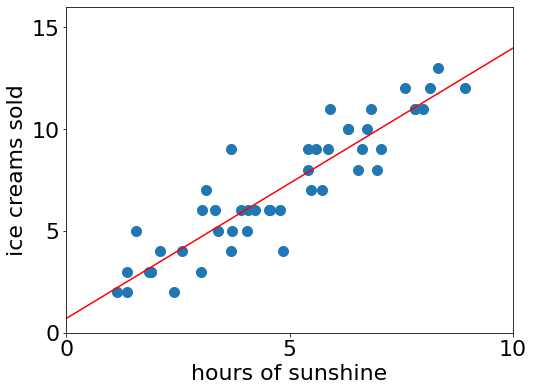

In [3]:
init_plot()
scatter = matplotlib.pyplot.scatter(data[:, 0], data[:, 1], s = 100)
hours   = numpy.arange(0, 11)
line    = matplotlib.pyplot.plot(hours, model(hours), "-r")

Now let's use our new machine learning model to make predictions!

Note that the model can make predictions outside of the range of hours for which we had data.  

In [4]:
model(0)

0.7056628623918849

In [5]:
model(2.1)

3.488777658761494

In [6]:
model(6.3)

9.055007251500712

In [7]:
model(8.7)

12.23570987592312

In [8]:
model(10.5)

14.62123684423993

# **K Nearest Neighbors Classification**

measurements of lengths of petals and sepals for two iris species

![iris](https://www.plant-world-seeds.com/images/item_images/000/003/884/large_square/IRIS_VERSICOLOR.JPG?1495391088)

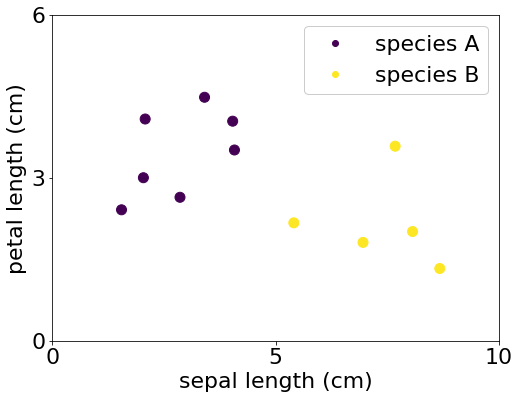

In [9]:
import numpy
import matplotlib.pyplot

data = numpy.array([(2.86, 2.64, 0), (1.55, 2.41, 0), (3.41, 4.48, 0), 
                    (5.41, 2.17, 1), (6.96, 1.81, 1), (8.68, 1.33, 1), 
                    (7.68, 3.58, 1), (2.08, 4.08, 0), (4.04, 4.04, 0), 
                    (2.04, 3.0,  0), (4.08, 3.51, 0), (8.07, 2.01, 1)])

def init_plot():
        matplotlib.rcParams.update({"font.size" : 22})
        matplotlib.pyplot.rcParams["figure.figsize"] = (8, 6)
        matplotlib.pyplot.xlim([0, 10])
        matplotlib.pyplot.ylim([0, 6])
        matplotlib.pyplot.xlabel("sepal length (cm)")
        matplotlib.pyplot.ylabel("petal length (cm)")
        matplotlib.pyplot.xticks([0, 5, 10])
        matplotlib.pyplot.yticks([0, 3, 6])

init_plot()
scatter = matplotlib.pyplot.scatter(data[:, 0], 
                                    data[:, 1], 
                                    c = data[:, 2], 
                                    s = 100)
markers = scatter.legend_elements()[0]
labels  = ["species A", "species B"]
legend  = matplotlib.pyplot.legend(handles    = markers, 
                                   labels     = labels,
                                   loc        = "upper right",
                                   framealpha = 1)

Compare given sepal and petal length pairs to given data.

In [10]:
def model(sepal_len, petal_len):
        diffs    = data[:, :2] - [sepal_len, petal_len]
        sq_dists = numpy.square(diffs[:, 0]) + numpy.square(diffs[:, 1])

        return data[:, 2][numpy.argmin(sq_dists)]

Note the model predictions for different points.

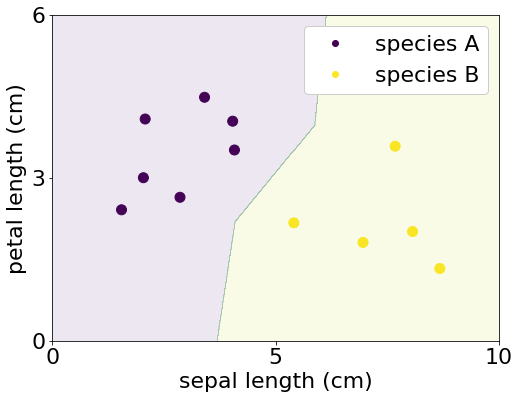

In [11]:
init_plot()
scatter = matplotlib.pyplot.scatter(data[:, 0], 
                                    data[:, 1], 
                                    c = data[:, 2], 
                                    s = 100)
markers = scatter.legend_elements()[0]
labels  = ["species A", "species B"]
legend  = matplotlib.pyplot.legend(handles    = markers, 
                                   labels     = labels,
                                   loc        = "upper right",
                                   framealpha = 1)
s       = numpy.arange(0.0, 10.0, 0.01)
p       = numpy.arange(0.0, 6.0, 0.01)
S, P    = numpy.meshgrid(s, p) 
model_  = numpy.fromiter(map(model, S.ravel(), P.ravel()), "float64")
model_  = model_.reshape(S.shape)
contour = matplotlib.pyplot.contourf(S, P, model_, alpha = 0.1)   

# **Perceptron Method Classification**

Let's use machine learning to find a line that divides the graph into a species A region and a species B region.  

Points above the line should always be one species and points below the line should always be the other species.

Denote this line by *wₛs + wₚp + b = 0* where *s* is the sepal length, *p* is the petal length, *wₛ* and *wₚ* are the weights, and, *b* is the bias.

Initially the weights and bias are set to zero.  They are slowly adjusted based on the errors with respect to the given data. 

In [12]:
LEARN_RATE = 0.1
N_EPOCHS   = 5

weights = numpy.array([0.0, 0.0])
bias    = 0.0
for i in range(N_EPOCHS):
        for e in data:
                pred     = weights[0] * e[0] + weights[1] * e[1] + bias > 0
                weights += LEARN_RATE * (e[2] - pred) * e[:2]
                bias    += LEARN_RATE * (e[2] - pred)

def model(sepal_len, petal_len):
        return weights[0] * sepal_len + weights[1] * petal_len + bias > 0

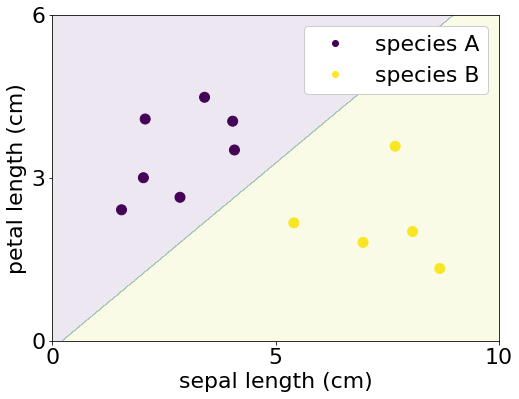

In [13]:
init_plot()
scatter = matplotlib.pyplot.scatter(data[:, 0], 
                                    data[:, 1], 
                                    c = data[:, 2], 
                                    s = 100)
markers = scatter.legend_elements()[0]
labels  = ["species A", "species B"]
legend  = matplotlib.pyplot.legend(handles    = markers, 
                                   labels     = labels,
                                   loc        = "upper right",
                                   framealpha = 1)
s       = numpy.arange(0.0, 10.0, 0.01)
p       = numpy.arange(0.0, 6.0, 0.01)
S, P    = numpy.meshgrid(s, p) 
contour = matplotlib.pyplot.contourf(S, P, model(S, P), alpha = 0.1)

The following code trains a model to detect the numeral 8 in images.  It uses a subset of the Modified National Institute of Standards and Technology database data (MNIST) for training.  Each image contains 784 pixels which each form an input of the perceptron model!  The model will only "see" images via NumPy arrays of numbers.  Similar models are used by the post office to detect zip codes on envelopes!

<img src="https://images.deepai.org/custom-datasets/images/80c67fa1229744fdae147f18240ab04d/mnist.png" width="50%">.


In [14]:
"""
Implements the perceptron method.

Note how NumPy is used to create compact fast code everywhere.
"""

import pandas
import numpy
import os

# The data is downloaded from the DAAML Github repository using the DATA_URL 
# URL.  DATA_SPLIT is the percentage of data that will be used for training.  
# LEARN_RATE is the learning rate and N_EPOCHS is the number of epochs.

DATA_URL   = "https://raw.githubusercontent.com/North-Houston-DAAML/talks/main/Basic-Machine-Learning/Methods%3A_Part_1/MNIST_subset_dataset"
DATA_SPLIT = 80
LEARN_RATE = 0.000001
N_EPOCHS   = 100

def min_max(data):
        """
        Finds the min max normalizations of data.

        Min max normalizations transform sets of numbers into ones with the 
        extrema zero and one. Let m and M denote the minimum and maximum of a 
        set of numbers. The min max normalization of that set replaces every 
        element x with (x - m) / (M - m). 

        The motivation is to have all data values between zero and one so that 
        any extreme values do not cause issues with training.
        """

        return (data - numpy.min(data)) / (numpy.max(data) - numpy.min(data))

def init_data(data, data_split):
        """
        Prepares the training and testing data.

        The data consists of an array where all the columns are input values 
        except the last column which contains the output values.  The data is 
        shuffled so that the initial ordering does not cause issues.  To 
        simplify the code the weights and bias are combined into the weights 
        array.  This requires appending a column of ones to the input data.
        A fraction of the data is used to train the model and the rest of the 
        data is used to test the model after it is created.
        """

        numpy.random.shuffle(data)
        data[:, :-1] = min_max(data[:, :-1])
        ones         = numpy.ones(data.shape[0])[None].T
        data         = numpy.hstack((data[:, :-1], ones, data[:, -1][None].T))
        data_split   = int((data_split / 100) * data.shape[0])

        return data[:data_split, :], data[data_split:, :]

def accuracy(data, weights):
        """
        Calculates the accuracies of models.

        This is equal to the percentage of model results that are correct. 
        """

        model_ = model(data[:, :-1], weights)

        return 100 * (model_ == data[:, -1]).astype(int).mean()

def model(inputs, weights):
        """
        Finds the model results.
        """

        return (numpy.matmul(inputs, weights) > 0).astype(int)

def learn(data, learn_rate, n_epochs):
        """
        Learns the weights from data.

        Weights are initially set to random values.  Epochs are parts of the 
        training in which the weights are adjusted for all the data.  There are 
        typically several epochs in training.
        """

        weights = numpy.random.rand(data.shape[1] - 1) / (data.shape[1] - 1)
        for i in range(n_epochs):
                for e in data:
                        model_   = model(e[:-1], weights)
                        weights += learn_rate * (e[-1] - model_) * e[:-1]

        return weights

# The data is read from the DAAML Github repository and ends up in a Numpy 
# array.  The init_data function is called to prepare the training and testing 
# data.  The learn function is called to find the weights used in the model.  
# Note that the weights array includes the weights and the bias.

data                  = pandas.read_csv(DATA_URL, 
                                        sep    = " ", 
                                        header = None, 
                                        dtype  = "float")
data                  = data.to_numpy()
train_data, test_data = init_data(data, DATA_SPLIT)
weights               = learn(train_data, LEARN_RATE, N_EPOCHS)
print(f"weights and bias:       {weights}")
print(f"training data accuracy: {accuracy(train_data, weights):.2f}%")
print(f"testing  data accuracy: {accuracy(test_data,  weights):.2f}%")

weights and bias:       [ 1.21240777e-03  9.94968997e-04  1.01208865e-04  7.25599278e-05
  1.21910534e-03  1.03394391e-03  4.91914960e-04  4.49634835e-04
  2.10380494e-04  8.69281073e-04  2.32477912e-04  9.66117580e-04
  7.04373707e-04  6.57198725e-04  8.10426948e-04  5.88472485e-04
  1.10691043e-03  9.16239731e-04  3.13849771e-04  1.17485427e-03
  8.24998608e-04  4.45851179e-04  3.64696034e-04  2.51582899e-04
  1.13356394e-03  4.73466428e-04  1.26098861e-03  1.07768053e-03
  3.20988413e-04  6.06633252e-04  8.17213079e-04  1.04045597e-03
  2.53662651e-05  4.07901865e-04  8.97616964e-04  8.37959124e-04
  1.12285878e-03  7.01842835e-04  2.16574036e-04  8.99218248e-04
  1.44514513e-05  3.46517470e-04  2.74965528e-04  2.07760885e-05
  5.43888499e-04  1.11638338e-03 -4.01706913e-05  1.28030389e-04
  1.08273893e-03  1.48335488e-04  1.43812576e-04  2.43254641e-04
  2.78323100e-04  1.05210413e-03  4.29917124e-04  4.93227062e-04
  1.04633674e-03  6.56794885e-04  8.68061690e-04  1.14140474e-03
 

Next, investigate: 

*   additional regression and classification methods
*   examples involving **several** input and output variables
*   Scikit-learn machine learning library

